# Implementing Logistic Regression using Scikit-Learn

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification: survival or deceased.

 - **Variable Name -  Variable Description**
 - PassengerID - Passenger ID          
 - Survived - Survival (0 = No; 1 = Yes)
 - Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
 - Name	- Name
 - Sex - Sex
 - Age - Age in years
 - SibSp - Number of Siblings/Spouses Aboard
 - Parch - Number of Parents/Children Aboard
 - Ticket - Ticket Number 
 - Fare - Passenger Fare
 - Cabin - Cabin number
 - Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
 
 ### Name: ROHAN VINAYAK SAGVEKAR

### a. Import Libraries

Import all necessary libraries


In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

import numpy as np

Our target variable will be **survived**.  Use the rest of the fields mentioned above to predict whether a passenger survived the Titanic shipwreck.

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the `pandas.read_csv` function. The ‘df_test.csv’ has been preprocessed (i.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the dataframe into X_test and y_test.  The ‘df_train’ data has NOT been preprocessed and you will need to preprocess and prepare the ‘df_train’ dataframe. Note: Neither df_train nor df_test have been scaled. The next few steps will enumerate data preprocessing, scaling requirements we need to perform.

In [30]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

2. The resulting dataframe (i.e., df_train) should have the shape (712,12) indicating that there are 712 instances and 12 columns.

In [31]:
print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)

df_train shape: (712, 12)
df_test shape: (179, 9)


3. In df_train dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

In [32]:
df_train[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,1
1,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
2,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
3,542,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,0
4,557,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1


4. Use the `pandas.isnull().sum()` function to check if there are any missing values in the df_train dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.

In [33]:
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Age         138
Cabin       541
Embarked      2
dtype: int64


5. Use the `pandas.DataFrame.drop()` function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns. 

In [34]:
df_train = df_train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
print(df_train.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')


6. Use the `pandas.DataFrame.fillna()` function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called **imputation** (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general.  
Use the `dropna()` function to drop any remaining **rows** that consist of NA values.

In [35]:
mean_age = df_train['Age'].mean()
df_train['Age'] = df_train['Age'].fillna(mean_age)
df_train = df_train.dropna()
print(df_train.isnull().sum())
print(df_train.shape)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64
(710, 8)


7. Your task is to use the feature columns to predict the target column. This can be cast as a classification problem.  
8. Create a pandas dataframe X_train of features (by dropping the ‘Survival’ column from the df_train dataframe). Create a pandas Series object of targets y_train (by only considering the ‘Survival’ column from the df_train dataframe). Moving forward, we will be working with X_train and y_train. At this point, also split the df_test into X_test and y_test by dropping the ‘Survival’ column and storing the features into X_test. Store the ‘Survival’ column in y_test.

In [36]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (710, 7)
y_train shape: (710,)
X_test shape: (179, 8)
y_test shape: (179,)


#### ii. Data Visualization

1. Employ a scatter plot using `matplotlib.pyplot.scatter` between the age of the passengers and the price of their fare. Label the x-axis and the y-axis and also give the plot a title.

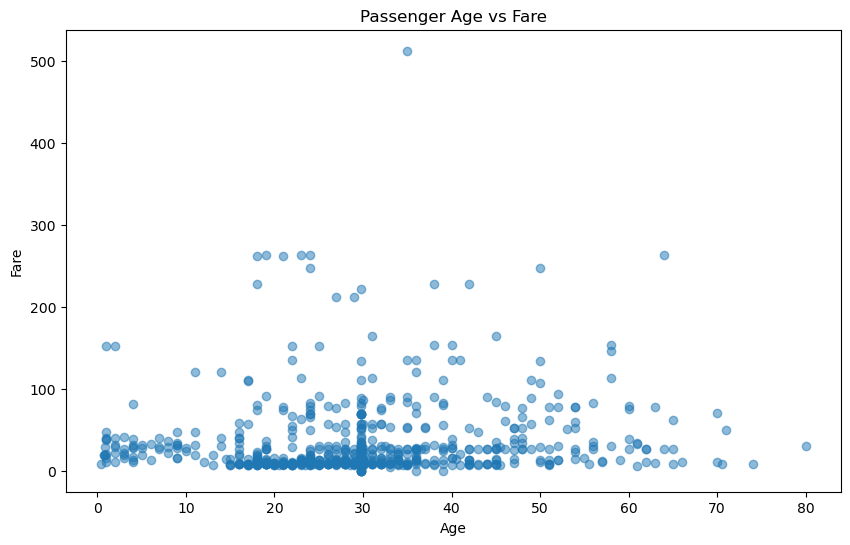

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Age'], X_train['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Passenger Age vs Fare')
plt.show()

Answer the following questions:
- What is the highest and lowest fare price? 

- What are the respective mean values of these two features? 

- What was the age of the oldest passenger?

In [38]:
highest_fare = df_train['Fare'].max()
lowest_fare = df_train['Fare'].min()
mean_age = df_train['Age'].mean()
mean_fare = df_train['Fare'].mean()
oldest_passenger = df_train['Age'].max()
print(f"Highest fare price: {highest_fare}")
print(f"Lowest fare price: {lowest_fare}")
print(f"Mean age: {mean_age}")
print(f"Mean fare: {mean_fare}")
print(f"Age of the oldest passenger: {oldest_passenger}")

Highest fare price: 512.3292
Lowest fare price: 0.0
Mean age: 29.75497865240222
Mean fare: 32.52509295774648
Age of the oldest passenger: 80.0


2. Use the df_train dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using `matplotlib.pyplot.bar` (Passenger Class column)

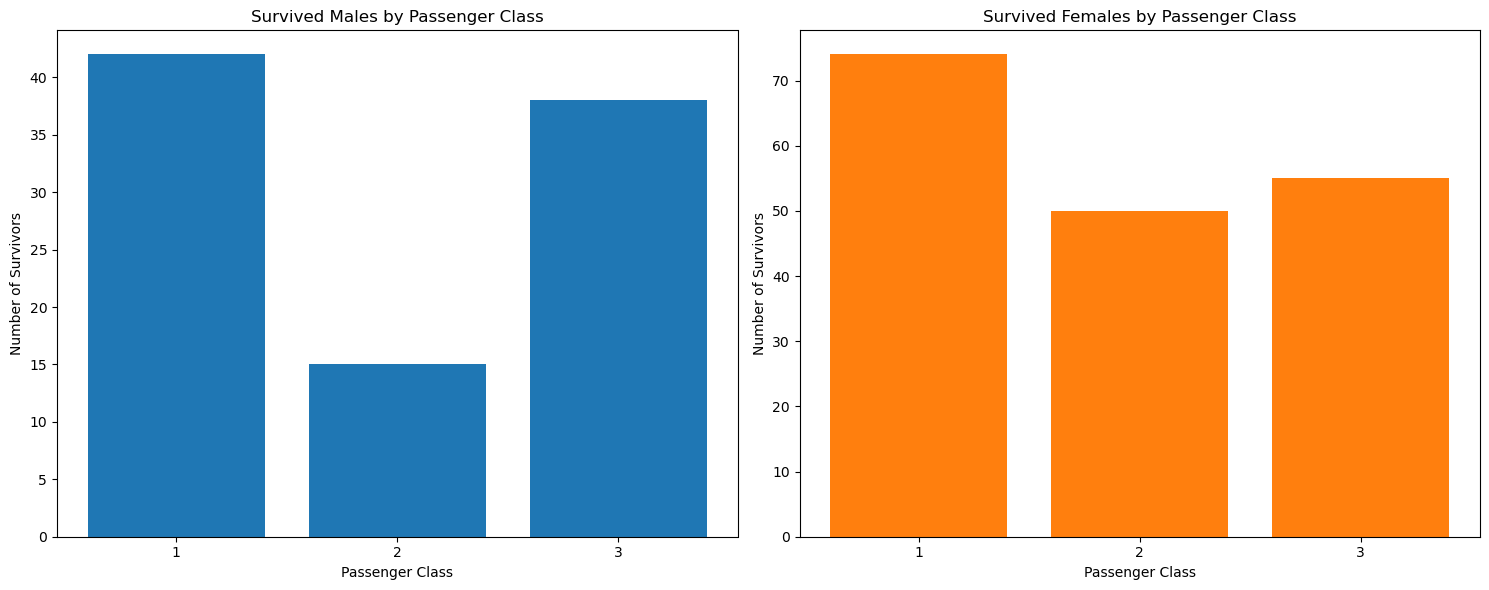

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
male_data = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)].groupby('Pclass').size()
ax1.bar(male_data.index, male_data.values, color="#1f77b4")
ax1.set_title('Survived Males by Passenger Class')
ax1.set_xlabel('Passenger Class')
ax1.set_ylabel('Number of Survivors')
ax1.set_xticks([1, 2, 3])
female_data = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)].groupby('Pclass').size()
ax2.bar(female_data.index, female_data.values, color='#ff7f0e')
ax2.set_title('Survived Females by Passenger Class')
ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Number of Survivors')
ax2.set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

Answer the following questions:
- Which class of passengers had the least number of survived males and how many? Repeat this analysis for females. 

- Which class of passengers had the greatest number of survived males and how many? Repeat this for females.

In [28]:
print("Male survivors by class:", male_data)
print("Female survivors by class:", female_data)

Male survivors by class: Pclass
1    42
2    15
3    38
dtype: int64
Female survivors by class: Pclass
1    74
2    50
3    55
dtype: int64


3. Using the Target variable (Survived) in y_train plot a bar chart showing the distribution of the ‘Survived’ column. 

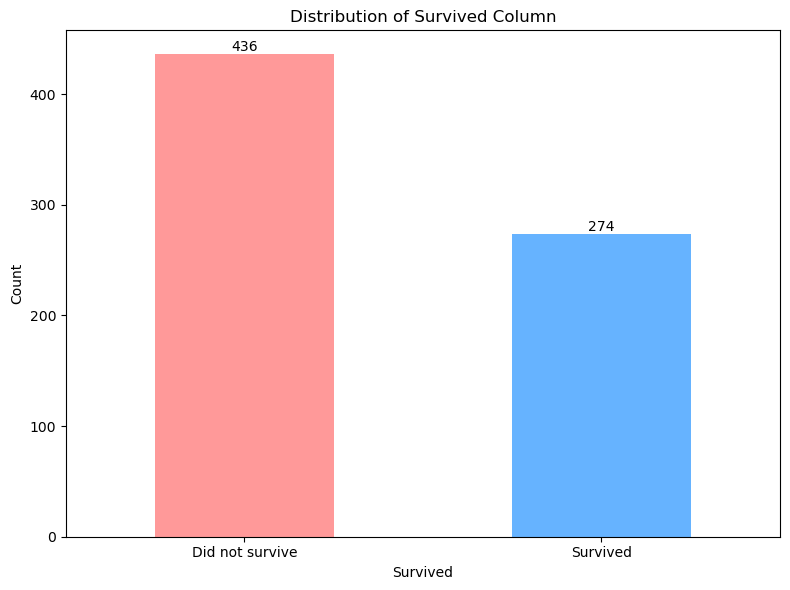

In [40]:
survival_counts = y_train.value_counts()
plt.figure(figsize=(8, 6))
survival_counts.plot(kind='bar', color=['#ff9999','#66b3ff'])
plt.title('Distribution of Survived Column')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did not survive', 'Survived'], rotation=0)
for i, v in enumerate(survival_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Answer the following question
- What initial comment can you make about this distribution in terms of the frequency of each class?

4. So far you should have successfully been able to load, preprocess and visualize your data. Use the `pd.get_dummies()` function to convert categorical data into dummy variables (‘Sex’ and ‘Embarked’). Make sure to pass `drop_first=True` to the `get_dummies()` function. (Perform this only on X_train and store the result back into X_train). 

In [41]:
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
print(X_train.columns)
print(X_train.shape)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')
(710, 8)


#### iii. Data Scaling

1. Use MinMaxScaler to scale only the **continuous attributes** of X_train. Apply the `fit_transform()` function of the scaler to obtain the scaled data and store it back in X_train.

In [42]:
scaler = MinMaxScaler()
continuous_cols = ['Age', 'SibSp', 'Parch', 'Fare']
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

2. Scale the X_test using the scaler you have just fit, this time using the `transform()` function. Note: Store the scaled values back into X_test. At the end of this step, you must have X_train, X_test, all scaled according to the MinMaxScaler.

In [43]:
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

### c. Modelling

#### i. Modelling (Model Instantiation / Training) using Logistic Regression classifier

1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’  

In [44]:
model_lr = LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [46]:
model_lr.fit(X_train, y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [59]:
y_pred_lr = model_lr.predict(X_test)

4. Employ the `accuracy_score` function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [60]:
accuracy= accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.8827


### d. Evaluation

#### i. Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1. Use `classification_report()` function from sklearn.metrics to report the precision, recall, and f1 score for each class for the `model_lr` model, along with a confusion matrix. 

In [61]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.8827

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       113
           1       0.86      0.82      0.84        66

    accuracy                           0.88       179
   macro avg       0.88      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179


Confusion Matrix:
[[104   9]
 [ 12  54]]
